# PLANTILLA EDA

**IMPORTANTE**: Recuerda hacer una copia de esta plantilla para no machacar la original.

## IMPORTAR PAQUETES

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#Automcompletar rápido
%config IPCompleter.greedy=True

## IMPORTAR LOS DATOS

Sustituir la ruta del proyecto.

In [56]:
ruta_proyecto = 'C:/Users/esteb/Escritorio/carpeta/Estudios/DS4B/03_MACHINE_LEARNING/08_CASOS/01_LEADSCORING'

Nombres de los ficheros de datos.

In [57]:
nombre_cat = 'cat_resultado_calidad.pickle'
nombre_num = 'num_resultado_calidad.pickle'

Cargar los datos.

In [58]:
cat = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_cat)
num = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_num)

## EDA CATEGÓRICAS

### Análisis estadístico

In [59]:
def frecuencias_cat(df_cat):
    resultado = df_cat.apply(lambda x: x.value_counts(normalize = True)).T.stack()\
                .to_frame().reset_index()\
                .rename(columns={'level_0':'Variable','level_1':'Valor',0: "Frecuencia"})\
                .sort_values(by = ['Variable','Frecuencia'])
    return(resultado)

In [60]:
frecuencias_cat(cat)

,Variable,Valor,Frecuencia
23,ambito,Healthcare Management,0.020282
26,ambito,International Business,0.023662
28,ambito,Media and Advertising,0.026479
33,ambito,Travel and Tourism,0.028357
20,ambito,"Banking, Investment And Insurance",0.044131
32,ambito,Supply Chain Management,0.044319
25,ambito,IT Projects Management,0.048638
21,ambito,Business Administration,0.052207
30,ambito,Operations Management,0.063286
29,ambito,OTROS,0.066291


Analizando la frecuencia de los valores que toma cada variable se toman las siguientes decisiones:

**Eliminar variable “conociste_”** ya que al parecer no aporta info relevante dado que los clientes no llenaron correctamente el formulario
**Eliminar los de no_enviar_email = yes**

**Eliminar ult_actividad = Email Bounced**


In [61]:
cat = cat.loc[(cat.no_enviar_email != 'Yes') & (cat.ult_actividad != 'Email Bounced')] \
        .drop(columns = ['conociste_facebook', 'conociste_google', 'conociste_periodico', 'conociste_referencias', 'conociste_youtube', 'no_enviar_email'])

Eliminamos registros del dataset num que no estan en cat para que no hayan problemas posteriormente

In [62]:
num = num[num.index.isin(cat.index)]

### Análisis gráfico

In [63]:
def graficos_eda_categoricos(cat):
    
    #Calculamos el número de filas que necesitamos
    from math import ceil
    filas = ceil(cat.shape[1] / 2)

    #Definimos el gráfico
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6))

    #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat 

    #Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)

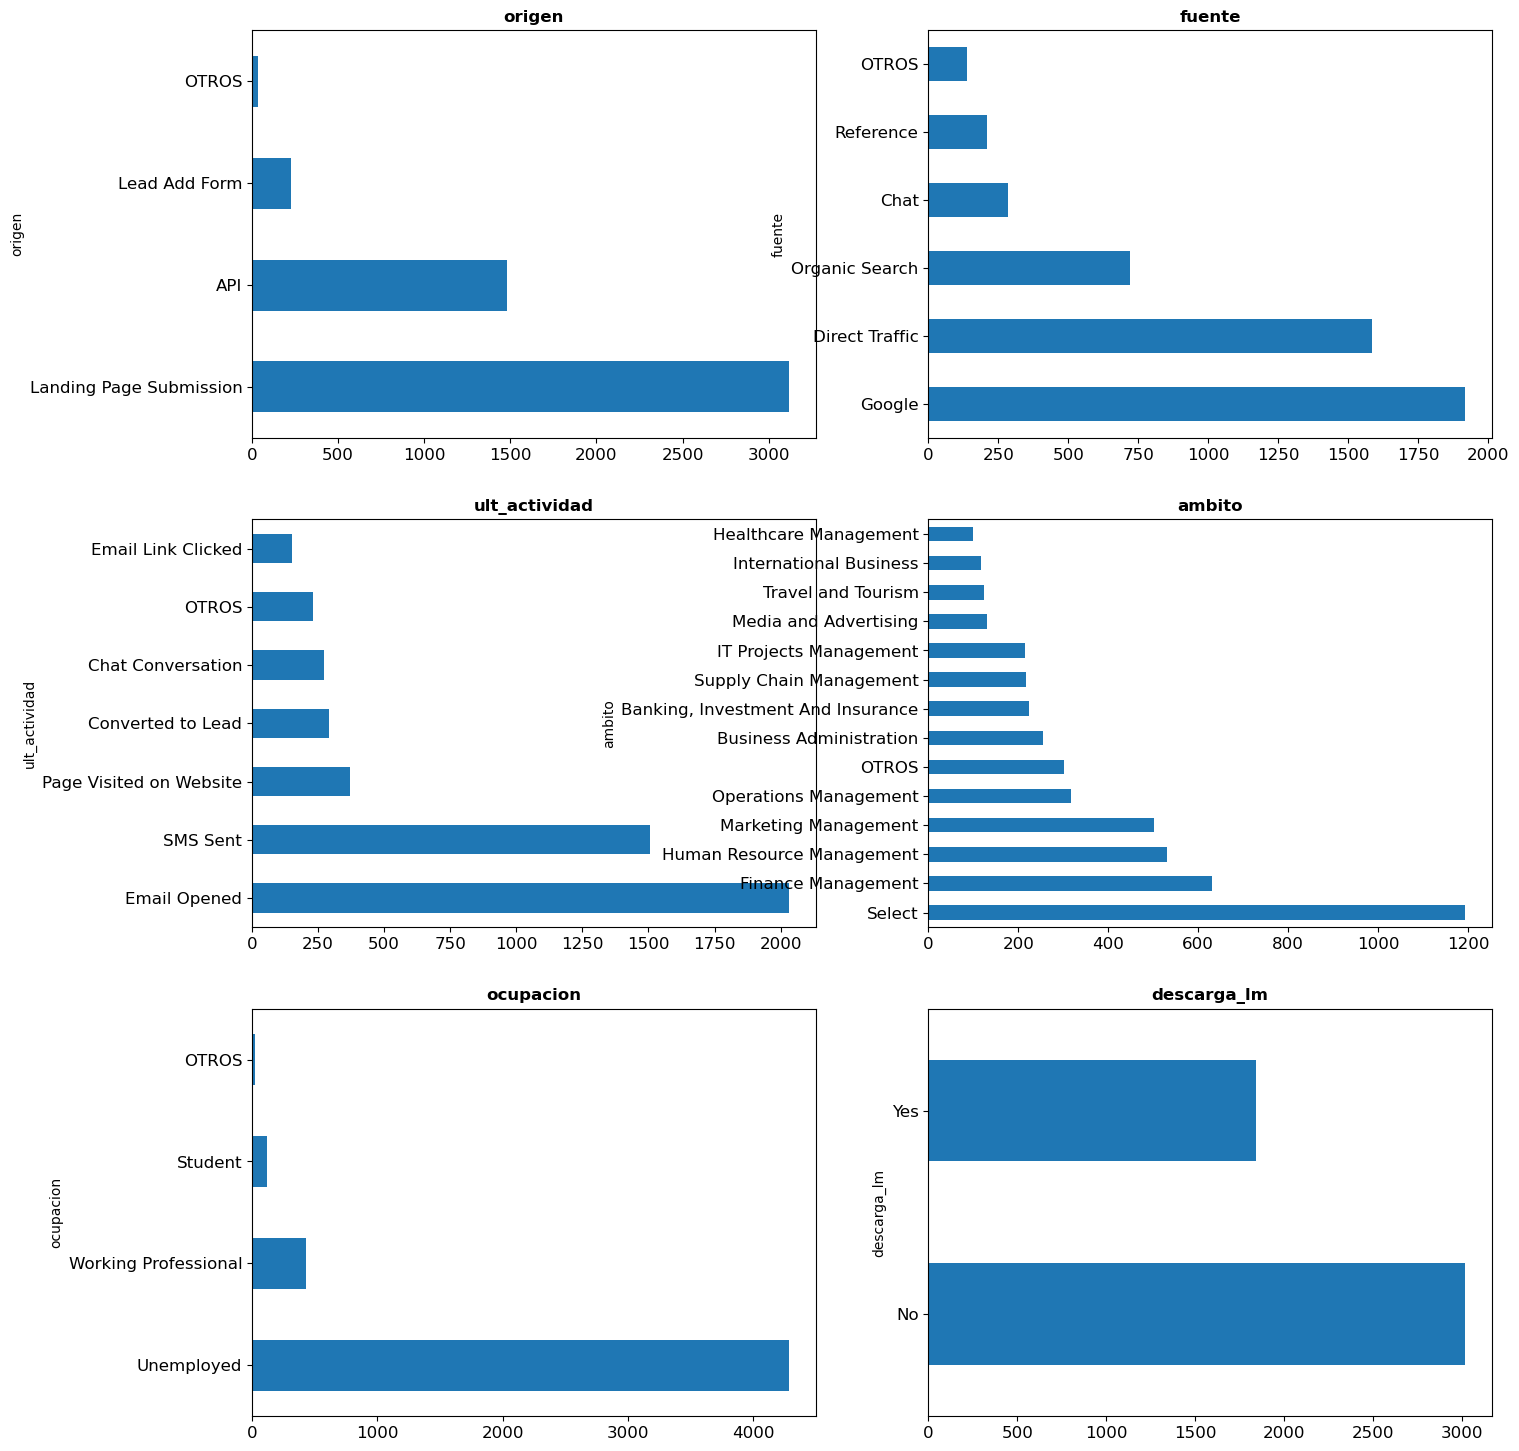

In [64]:
graficos_eda_categoricos(cat)

## EDA NUMÉRICAS

### Análisis estadístico

In [65]:
def estadisticos_cont(num):
    #Calculamos describe
    estadisticos = num.describe().T
    #Añadimos la mediana
    estadisticos['median'] = num.median()
    #Reordenamos para que la mediana esté al lado de la media
    estadisticos = estadisticos.iloc[:,[0,1,8,2,3,4,5,6,7]]
    #Lo devolvemos
    return(estadisticos)

In [66]:
estadisticos_cont(num)

,count,mean,median,std,min,25%,50%,75%,max
compra,4857.0,0.418159,0.0,0.493307,0.0,0.0,0.0,1.0,1.0
visitas_total,4857.0,4.125592,3.0,3.349537,0.0,2.0,3.0,5.0,43.0
tiempo_en_site_total,4857.0,603.561458,367.0,553.013167,0.0,130.0,367.0,1095.0,2272.0
paginas_vistas_visita,4857.0,2.880235,2.5,1.888943,0.0,2.0,2.5,4.0,20.0
score_actividad,4857.0,14.062178,14.0,0.94899,7.0,14.0,14.0,14.0,18.0
score_perfil,4857.0,16.311715,16.0,1.435894,11.0,16.0,16.0,17.0,20.0


### Análisis gráfico

In [67]:
def graficos_eda_continuas(num):
    
    #Calculamos el número de fila que necesitamos
    from math import ceil
    filas = ceil(num.shape[1] / 2)

    #Definimos el gráfico
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6))

    #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat 

    #Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(num):
        num[variable].plot.density(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)

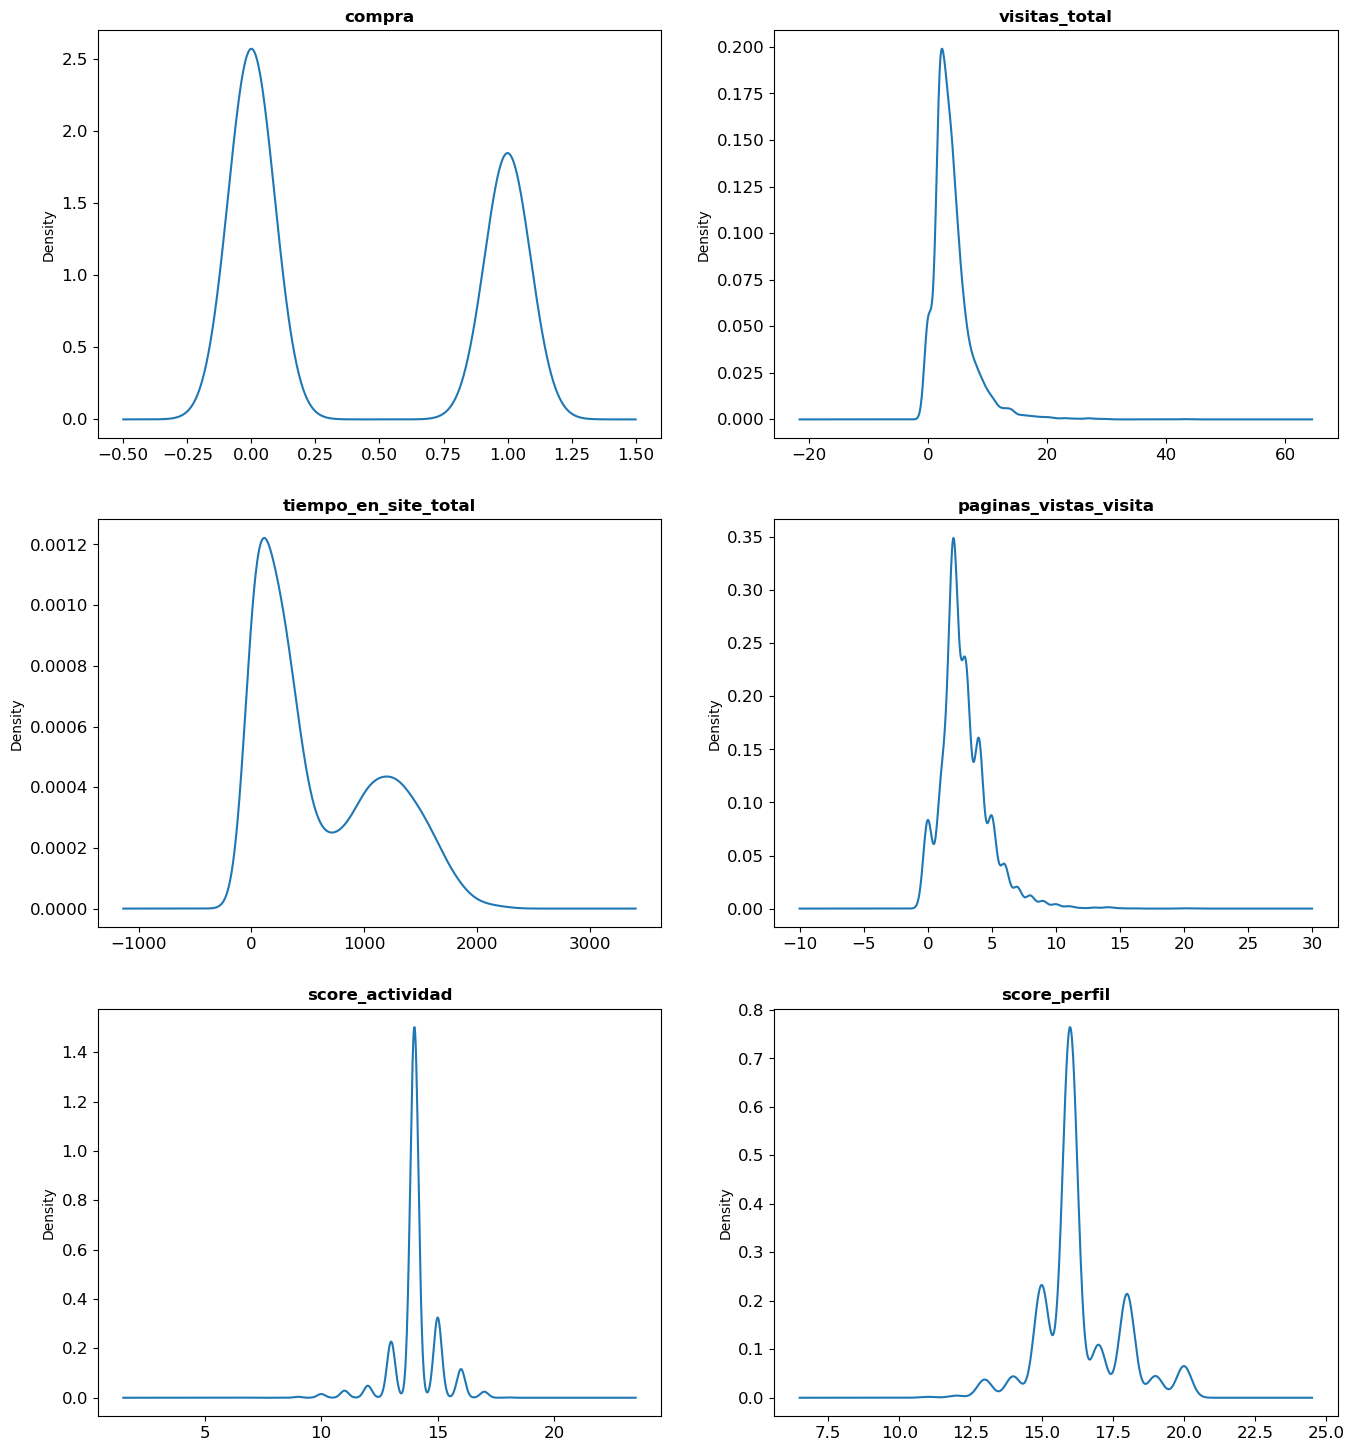

In [68]:
graficos_eda_continuas(num)

## GUARDAR DATASETS TRAS CALIDAD DE DATOS

Guarda los avances en cat y num con un sufijo para poder guardar o recuperar avances del proyecto.

En formato pickle para no perder las modificaciones de metadatos.

*NOTA: En algunos casos no hay cambios en los ficheros en esta fase, así que este paso es opcional.Pero si no guardas estos ficheros acuérdate de modificar la importación en el siguiente notebook.*

In [69]:
#Definir los nombres de los archivos
ruta_cat = ruta_proyecto + '/02_Datos/03_Trabajo/' + 'cat_resultado_eda.pickle'
ruta_num = ruta_proyecto + '/02_Datos/03_Trabajo/' + 'num_resultado_eda.pickle'

In [70]:
#Guardar los archivos
cat.to_pickle(ruta_cat)
num.to_pickle(ruta_num)

In [78]:
cat

,origen,fuente,ult_actividad,ambito,ocupacion,descarga_lm
id,,,,,,
660737,API,Chat,Page Visited on Website,Select,Unemployed,No
660727,Landing Page Submission,Direct Traffic,Email Opened,Business Administration,Student,Yes
660719,Landing Page Submission,Direct Traffic,OTROS,Media and Advertising,Unemployed,No
660680,API,Chat,Chat Conversation,Select,Unemployed,No
660664,API,Chat,Chat Conversation,Select,Unemployed,No
...,...,...,...,...,...,...
579697,Landing Page Submission,Google,Email Opened,"Banking, Investment And Insurance",Unemployed,No
579642,Landing Page Submission,Direct Traffic,SMS Sent,Human Resource Management,Unemployed,Yes
579546,Landing Page Submission,Direct Traffic,SMS Sent,Media and Advertising,Unemployed,Yes
